# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory code below

In [35]:
# Write your answer here:
print(2513248)


2513248


<font size = "5">

Import the "pandas", "matplotlib.pyplot", "numPy" and "statsmodels.formula.api" libraries

In [36]:
# Write your answer here:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


<font size = "5">

(a) Functions

<font size = "3">

- Read the dataset labelled features.csv.
- Create a ``` lambda ``` function that checks if horsepower $>$ 100
- Create a new list that shows true if horsepower $>$ 100 and false <br>
if horsepower $\leq$ 100.
- Count how many cars have horsewpower $> 100$.

To get full credit use either the apply or the map function <br>
(see Lectures 7 and 8)

In [41]:
# Write your answer here

features = pd.read_csv("data/features.csv")
fn_horsepower_100 = lambda horsepower: horsepower > 100
features['horsepower'] = pd.to_numeric(features['horsepower'], errors='coerce')
horsepower_count = sum(list(map(fn_horsepower_100, features["horsepower"])))

print("Number of cars with horsepower > 100:", horsepower_count)



Number of cars with horsepower > 100: 150


<font size = "5">

(b) Subsetting Data

<font size = "3" >

- Read the dataset labelled features.csv.
- Define a global variable called ```threshold``` that takes the <br>
value 3000
- Subset the data to get one dataset with weight $>$ threshold and <br>
another with weight $\le$ 3000. Use the ```.query()``` function.
- Compute the mean acceleration for each of these datasets.<br>

Note: Review how to define a gloabl variable inside ```.query()```
 

In [48]:
# Write your answer here:

threshold = 3000
data_weight_threshold = features.query("weight > @threshold")
data_weight_threshold2 = features.query("weight <= @threshold")

mean_acceleration_threshold = data_weight_threshold['acceleration'].mean()
mean_acceleration_threshold2 = data_weight_threshold2['acceleration'].mean()

print("The mean acceleration for weight greater than threshold is: ", mean_acceleration_threshold)
print("The mean acceleration for weight less than threshold is: ", mean_acceleration_threshold2)


The mean acceleration for weight greater than threshold is:  14.7
The mean acceleration for weight less than threshold is:  16.202173913043477


<font size = "5">

(c) Regression

<font size = "3">

In this exercise you are asked to plot acceleration vs. weight and to plot <br>
 the best fit line.

- Run a linear regression between acceleration and weight.
- Extract the intercept and coefficient.
- Using your predicted coefficients, compute the predicted value of acceleration
- Plot a scatter plot with acceleration on the y axis and weight on the x axis.
- On that same figure, plot a line with the predicted values of acceleration

Do not forget to label your axes and title.

Intercept    19.606158
weight       -0.001359
dtype: float64


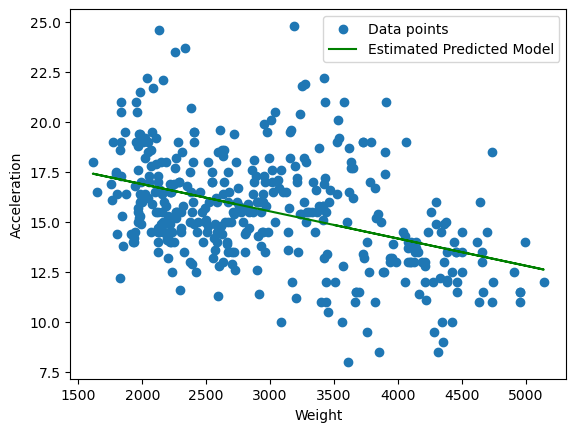

In [72]:
model = smf.ols(formula = 'acceleration ~  weight', data = features)
results = model.fit()
b_list = results.params
print(b_list)

features["p_estimated"] = b_list[0] + b_list[1]  * features["weight"]
features["p_estimated"]

plt.scatter(x = features["weight"],y = features["acceleration"])
plt.plot(features["weight"],features["p_estimated"], color = 'green')
plt.xlabel("Weight")
plt.ylabel("Acceleration")
plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()



<font size = "5">

(d) Use sorting + ".iloc[]"

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Use ".sort_values()" to order the "Age" column <br>
from youngest to oldest
- Get a subset with the 5 youngest players

In [55]:
# Write your own code
fifaplayers = pd.read_csv("data/fifa23_players_basic.csv")
fifaplayers_ascending = fifaplayers.sort_values(by='Age', ascending=True)
fifaplayers_ascending.iloc[:5]




,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
17956,A. Dithmer,Andreas Dithmer,53,76,275000,GK,GK,Denmark,https://cdn.sofifa.net/players/269/573/23_60.png,16,...,Right,2,1,1,-,https://cdn.sofifa.net/flags/dk.png,-,-,Medium,Medium
18014,J. Ardila,José Ardila,53,73,250000,CM,CAM,Venezuela,https://cdn.sofifa.net/players/268/892/23_60.png,16,...,Right,3,2,1,-,https://cdn.sofifa.net/flags/ve.png,-,-,Medium,Medium
16084,S. Ngoma,Serge Ngoma,58,82,650000,RW,RM,United States,https://cdn.sofifa.net/players/267/796/23_60.png,16,...,Right,3,2,1,-,https://cdn.sofifa.net/flags/us.png,-,-,High,Medium
11481,O. Vargas,Obed Vargas,64,81,1500000,"CM,CDM,RM",CAM,United States,https://cdn.sofifa.net/players/263/701/23_60.png,16,...,Right,3,3,1,-,https://cdn.sofifa.net/flags/us.png,-,-,High,Medium
17591,A. Madaliński,Alan Madaliński,54,68,210000,GK,GK,Poland,https://cdn.sofifa.net/players/270/590/23_60.png,16,...,Right,3,1,1,-,https://cdn.sofifa.net/flags/pl.png,-,-,Medium,Medium


<font size = "5">

(e) Use queries + global variables

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Compute the mean of the column "Value(in Euro)" <br>
and store it as a variable
- Subset the players whose value is above the mean value <br>
  using ".query()"


HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
Reference the column as ``` `Value(in Euro)`    ``` inside .query()

In [61]:
# Write your own code
Value_mean = fifaplayers["Value(in Euro)"].mean()
subset_fifaplayers = fifaplayers.query("`Value(in Euro)` > @Value_mean")


<font size = "5">